<a href="https://colab.research.google.com/github/Kwasi-Dankwa/Game-sales/blob/main/gamemodelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NINTENDO GAME SALES PREDICTIVE MODELLING

In [5]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
# loading csv
df = pd.read_csv('/content/cleanvgdata.csv')
df.head(20)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


# EDA PHASE

In [4]:
# column statistic
df.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16451.000000,16451.000000,16451.000000,16451.000000,16451.000000,16451.000000,16451.000000
mean,8291.215853,2006.412984,0.265368,0.147442,0.078185,0.048299,0.539567
std,4792.844853,5.815858,0.819648,0.507391,0.310507,0.189341,1.561140
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4134.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8289.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12440.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16451 entries, 0 to 16450
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16451 non-null  int64  
 1   name          16451 non-null  object 
 2   platform      16451 non-null  object 
 3   year          16451 non-null  int64  
 4   genre         16451 non-null  object 
 5   publisher     16451 non-null  object 
 6   na_sales      16451 non-null  float64
 7   eu_sales      16451 non-null  float64
 8   jp_sales      16451 non-null  float64
 9   other_sales   16451 non-null  float64
 10  global_sales  16451 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [6]:
df.shape

(16451, 11)

In [7]:
# checking for null values
df.isnull().sum()

,0
rank,0
name,0
platform,0
year,0
genre,0
publisher,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0


This confirms the data set was cleaned using sql as there are no columns with null values

# VISUALIZATIONS

array([[<Axes: title={'center': 'rank'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'na_sales'}>],
       [<Axes: title={'center': 'eu_sales'}>,
        <Axes: title={'center': 'jp_sales'}>,
        <Axes: title={'center': 'other_sales'}>],
       [<Axes: title={'center': 'global_sales'}>, <Axes: >, <Axes: >]],
      dtype=object)

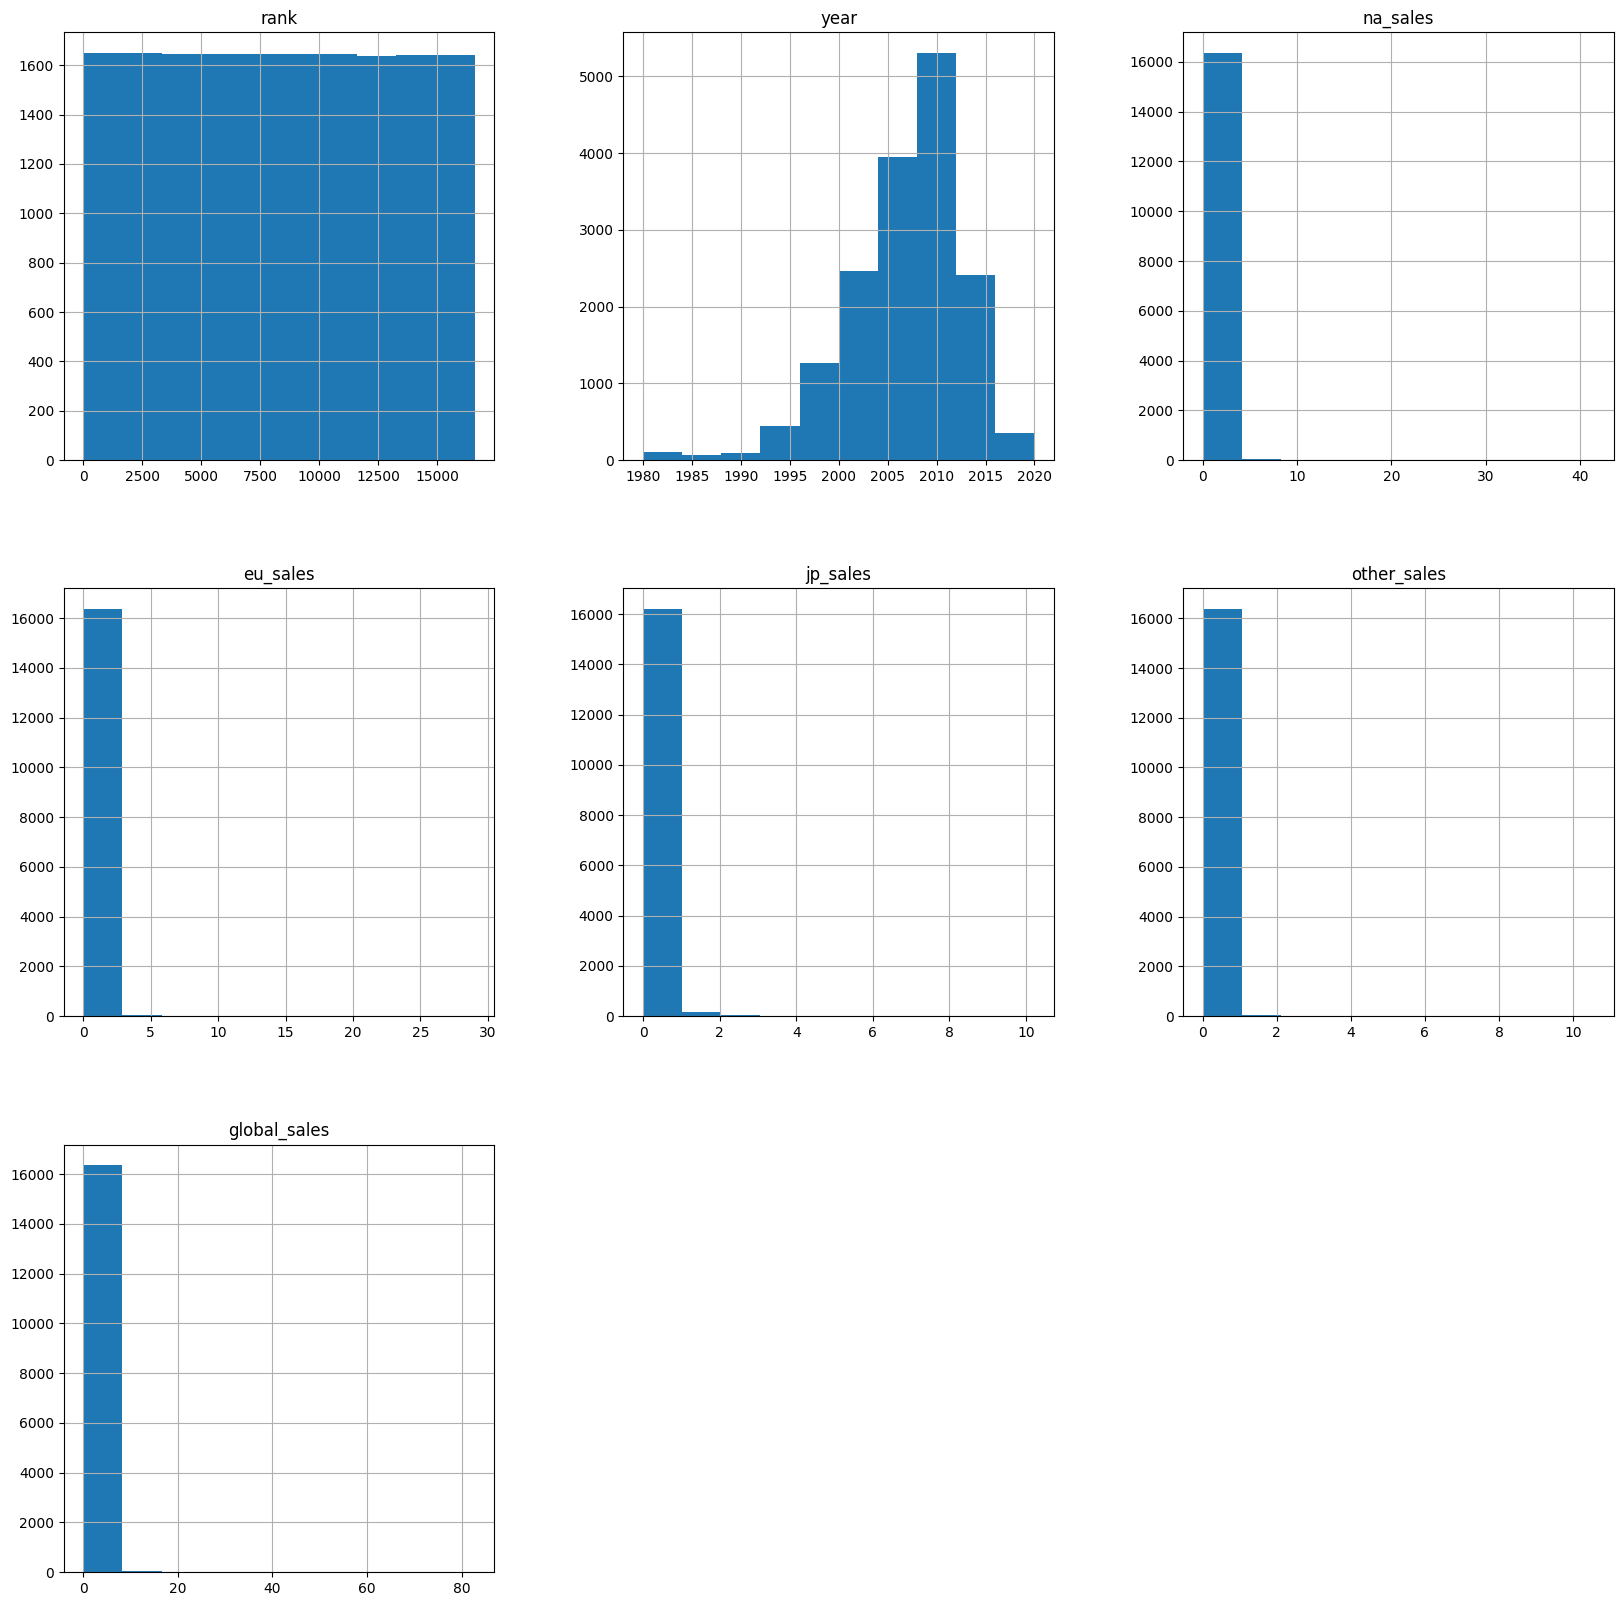

In [8]:
#  Histogram/ Visualization
df.hist(figsize=(20,20) )

In [9]:
# Filter for Nintendo games and relevant years (2010-2016)
nintendo_df = df[(df['publisher'] == 'Nintendo') & (df['year'].between(2010, 2016))].copy()
industry_df = df[df['year'].between(2010, 2016)].copy()

In [10]:
# Convert year to integer
nintendo_df['year'] = nintendo_df['year'].astype(int)
industry_df['year'] = industry_df['year'].astype(int)

In [11]:
print(f"Nintendo data rows after filtering: {nintendo_df.shape[0]}")
print(f"Industry data rows after filtering: {industry_df.shape[0]}")

Nintendo data rows after filtering: 171
Industry data rows after filtering: 5188


# --- 2. KPI ANALYSIS ---


- Number of Titles

In [13]:
# Number of titles dropped per year by publisher in industry df
titles_per_year_publisher = industry_df.groupby(['year', 'publisher']).size().reset_index(name='number_of_titles')
print("\n--- Number of Titles Released Annually by Publisher (Industry) ---")
print(titles_per_year_publisher.to_markdown(index=False, numalign="left", stralign="left"))


--- Number of Titles Released Annually by Publisher (Industry) ---
| year   | publisher                              | number_of_titles   |
|:-------|:---------------------------------------|:-------------------|
| 2010   | 505 Games                              | 22                 |
| 2010   | 5pb                                    | 10                 |
| 2010   | 7G//AMES                               | 1                  |
| 2010   | ASCII Media Works                      | 3                  |
| 2010   | Abylight                               | 1                  |
| 2010   | Ackkstudios                            | 1                  |
| 2010   | Acquire                                | 3                  |
| 2010   | Activision                             | 90                 |
| 2010   | Aerosoft                               | 1                  |
| 2010   | Alchemist                              | 10                 |
| 2010   | Alternative Software                   | 1   

The data shows a wide range of publishers from AAA publishers, AA Publishers and Indie Publishers.

It is also important to note this data isn't comprehensive therefore there is going to be some bias in the data.

In [29]:
# Group by platform and sum global sales
platform_sales = df.groupby('platform')['global_sales'].sum().reset_index()

# Sort by global sales in descending order and select the top 20
top_20_platforms = platform_sales.sort_values(by='global_sales', ascending=False).head(20)

print("\n--- Top 10 Most Popular Platforms by Global Sales ---")
print(top_20_platforms.to_markdown(index=False, numalign="left", stralign="left"))


--- Top 10 Most Popular Platforms by Global Sales ---
| platform   | global_sales   |
|:-----------|:---------------|
| PS2        | 1247.05        |
| X360       | 975.11         |
| PS3        | 953.32         |
| Wii        | 922.34         |
| DS         | 820.61         |
| PS         | 727.39         |
| GBA        | 314.4          |
| PSP        | 295.8          |
| PS4        | 278.1          |
| PC         | 258.16         |
| XB         | 257.19         |
| GB         | 254.42         |
| NES        | 251.07         |
| 3DS        | 247.01         |
| N64        | 218.68         |
| SNES       | 200.05         |
| GC         | 199.09         |
| XOne       | 141.06         |
| 2600       | 89.1           |
| WiiU       | 81.86          |


This analysis shows that Sony and Microsfot Platforms have been dominating sales between 2010 and 2016 with Nintendo lagging behind.

The goal to boost market share can be achieved by targeting underepresented markets in other territories than Nintendo Might not have a strongm foothold in.

In [14]:
# Number of titles dropped per year by Nintendo
nintendo_titles_per_year = nintendo_df.groupby('year').size().reset_index(name='number_of_titles')
print("\n--- Number of Titles Released Annually by Nintendo ---")
print(nintendo_titles_per_year.to_markdown(index=False, numalign="left", stralign="left"))




--- Number of Titles Released Annually by Nintendo ---
| year   | number_of_titles   |
|:-------|:-------------------|
| 2010   | 29                 |
| 2011   | 26                 |
| 2012   | 31                 |
| 2013   | 23                 |
| 2014   | 20                 |
| 2015   | 32                 |
| 2016   | 10                 |


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

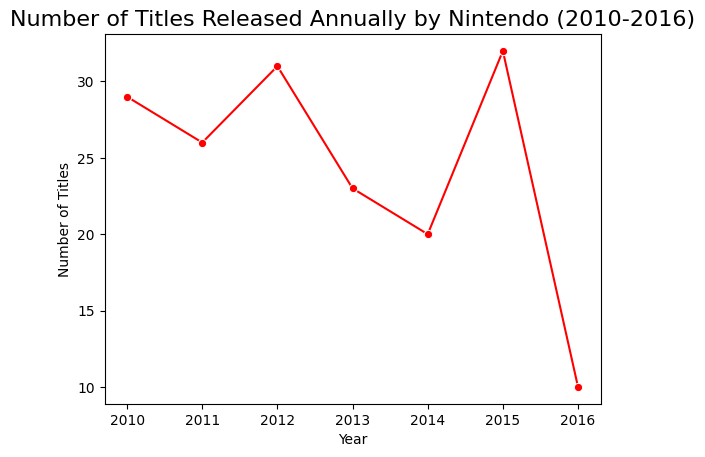

In [16]:
# Plot visual of number of titles Nintendo dropped
plt.figure()
sns.lineplot(x='year', y='number_of_titles', data=nintendo_titles_per_year, marker='o', color='red')
plt.title('Number of Titles Released Annually by Nintendo (2010-2016)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(nintendo_titles_per_year['year'])
plt

The graph shows a fluctuating but generally high number of releases from 2010 to 2015, followed by a sharp decline in 2016. This decline coincides with the end of the Wii U's lifecycle and the lead-up to the launch of the Nintendo Switch in 2017.

- Market Share

In [ ]:
# **Q1: How has Nintendo’s market share evolved annually?**
# Calculate annual global sales for Nintendo and the entire industry
nintendo_annual_sales = nintendo_df.groupby('year')['global_sales'].sum().reset_index()
industry_annual_sales = industry_df.groupby('year')['global_sales'].sum().reset_index()

In [ ]:
# Merges and calculate market share
market_share_df = nintendo_annual_sales.merge(
    industry_annual_sales, on='year', suffixes=('_nintendo', '_industry')
)
market_share_df['market_share'] = (market_share_df['global_sales_nintendo'] / market_share_df['global_sales_industry']) * 100

print("\n--- Nintendo Annual Market Share (2010-2016) ---")
print(market_share_df[['year', 'market_share']].to_markdown(index=False, numalign="left", stralign="left"))


--- Nintendo Annual Market Share (2010-2016) ---
| year   | market_share   |
|:-------|:---------------|
| 2010   | 10.0809        |
| 2011   | 9.92488        |
| 2012   | 15.3247        |
| 2013   | 14.3206        |
| 2014   | 14.4187        |
| 2015   | 10.2405        |
| 2016   | 4.89215        |


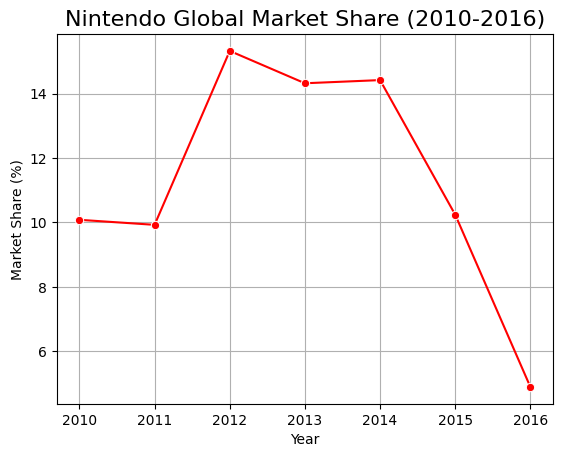

In [ ]:
# Plot market share evolution
plt.figure()
sns.lineplot(x='year', y='market_share', data=market_share_df, marker='o', color='red')
plt.title('Nintendo Global Market Share (2010-2016)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.xticks(market_share_df['year'])
plt.grid(True)
plt.show()

This graph shows a period of moderate market share from 2010-2011, a peak in 2012-2014, and a dramatic decrease from 2015-2016. This decline reflects possible commercial struggles in game titles or platform. Further analysis will be needed to understand the reason for a sharp decline

In [18]:
# find top 3 companies in market share each year and visualize
top_companies_df = nintendo_df.groupby(['year', 'publisher'])['global_sales'].sum().reset_index()
top_companies_df['rank'] = top_companies_df.groupby('year')['global_sales'].rank(method='first', ascending=False)
top_companies = top_companies_df[top_companies_df['rank'] <= 3].sort_values(by=['year', 'rank'])


In [ ]:
# **Q2: Which genres (top 3 annually) drove outsized performance?**
print("\n--- Top 3 Nintendo Genres by Global Sales per Year ---")
top_genres_by_year = nintendo_df.groupby(['year', 'genre'])['global_sales'].sum().reset_index()
top_genres_by_year['rank'] = top_genres_by_year.groupby('year')['global_sales'].rank(method='first', ascending=False)
top_genres = top_genres_by_year[top_genres_by_year['rank'] <= 3].sort_values(by=['year', 'rank'])

print(top_genres[['year', 'genre', 'global_sales']].to_markdown(index=False, numalign="left", stralign="left"))


--- Top 3 Nintendo Genres by Global Sales per Year ---
| year   | genre        | global_sales   |
|:-------|:-------------|:---------------|
| 2010   | Role-Playing | 21.17          |
| 2010   | Platform     | 19             |
| 2010   | Misc         | 11.32          |
| 2011   | Platform     | 13.53          |
| 2011   | Racing       | 12.21          |
| 2011   | Action       | 10.74          |
| 2012   | Role-Playing | 18.36          |
| 2012   | Platform     | 15.01          |
| 2012   | Simulation   | 9.81           |
| 2013   | Role-Playing | 18.39          |
| 2013   | Platform     | 10.88          |
| 2013   | Action       | 9.83           |
| 2014   | Role-Playing | 18.79          |
| 2014   | Fighting     | 12.47          |
| 2014   | Racing       | 6.96           |
| 2015   | Role-Playing | 5.56           |
| 2015   | Platform     | 5.24           |
| 2015   | Shooter      | 4.57           |
| 2016   | Action       | 3.05           |
| 2016   | Shooter      | 0.35           


--- Total Regional Sales Contribution (2010-2016) ---
|             | 0      |
|:------------|:-------|
| na_sales    | 112.68 |
| jp_sales    | 88.56  |
| eu_sales    | 80.87  |
| other_sales | 19     |


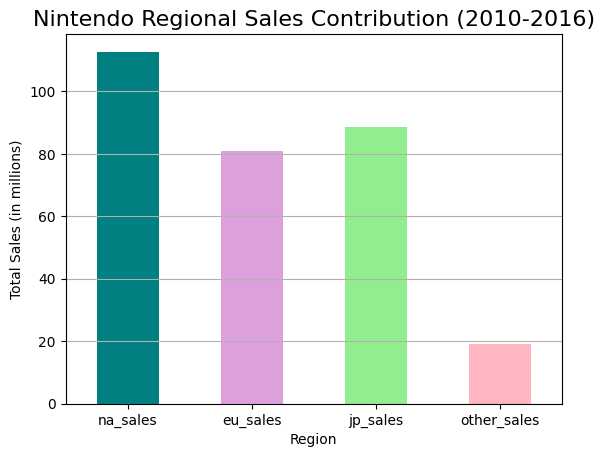

In [ ]:
# **Q3: Which regions contribute most to sales?**
regional_sales = nintendo_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
print("\n--- Total Regional Sales Contribution (2010-2016) ---")
print(regional_sales.sort_values(ascending=False).to_markdown(numalign="left", stralign="left"))

# Plot regional sales contribution
plt.figure()
regional_sales.plot(kind='bar', color=['#008080', '#DDA0DD', '#90EE90', '#FFB6C1'])
plt.title('Nintendo Regional Sales Contribution (2010-2016)', fontsize=16)
plt.xlabel('Region')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

The chart clearly indicates that North America was the strongest market for Nintendo during the 2010-2016 period, followed by Japan and then Europe. Other regions contributed a significantly smaller amount to the total sales.

# Industry Wide KPI Analysis
Analyze the provided industry data to determine the top 3 companies by market share each year and visualize the results.

## Calculated annual sales for each publisher


Calculating annual global sales for each publisher from 2010 to 2016 using the `industry_df` DataFrame.


In [19]:
publisher_annual_sales = industry_df.groupby(['year', 'publisher'])['global_sales'].sum().reset_index()

## Calculate total industry sales per year




In [20]:
industry_annual_sales = industry_df.groupby('year')['global_sales'].sum().reset_index()

In [21]:
# Merge the publisher and industry annual sales dataframes and calculate the market share for each publisher.
market_share_publisher_df = publisher_annual_sales.merge(
    industry_annual_sales, on='year', suffixes=('_publisher', '_industry')
)
market_share_publisher_df['market_share'] = (market_share_publisher_df['global_sales_publisher'] / market_share_publisher_df['global_sales_industry']) * 100

## Rank companies by market share



In [25]:
# Rank the companies by market share within each year.
market_share_publisher_df['rank'] = market_share_publisher_df.groupby('year')['market_share'].rank(method='first', ascending=False)

## Filter for top 3 companies




In [23]:
# Filter the ranked market share data to select the top 3 companies for each year
top_3_companies = market_share_publisher_df[market_share_publisher_df['rank'] <= 3].sort_values(by=['year', 'rank'])
print("\n--- Top 3 Companies by Market Share per Year (2010-2016) ---")
print(top_3_companies[['year', 'publisher', 'market_share']].to_markdown(index=False, numalign="left", stralign="left"))


--- Top 3 Companies by Market Share per Year (2010-2016) ---
| year   | publisher                   | market_share   |
|:-------|:----------------------------|:---------------|
| 2010   | Electronic Arts             | 13.429         |
| 2010   | Activision                  | 10.7294        |
| 2010   | Nintendo                    | 10.0809        |
| 2011   | Electronic Arts             | 13.9156        |
| 2011   | Activision                  | 9.96533        |
| 2011   | Nintendo                    | 9.92488        |
| 2012   | Nintendo                    | 15.3247        |
| 2012   | Activision                  | 14.4509        |
| 2012   | Electronic Arts             | 13.5418        |
| 2013   | Electronic Arts             | 14.4101        |
| 2013   | Nintendo                    | 14.3206        |
| 2013   | Take-Two Interactive        | 14.2175        |
| 2014   | Nintendo                    | 14.4187        |
| 2014   | Electronic Arts             | 13.8704        |
| 2014   |

## Visualize the top 3 companies' market share




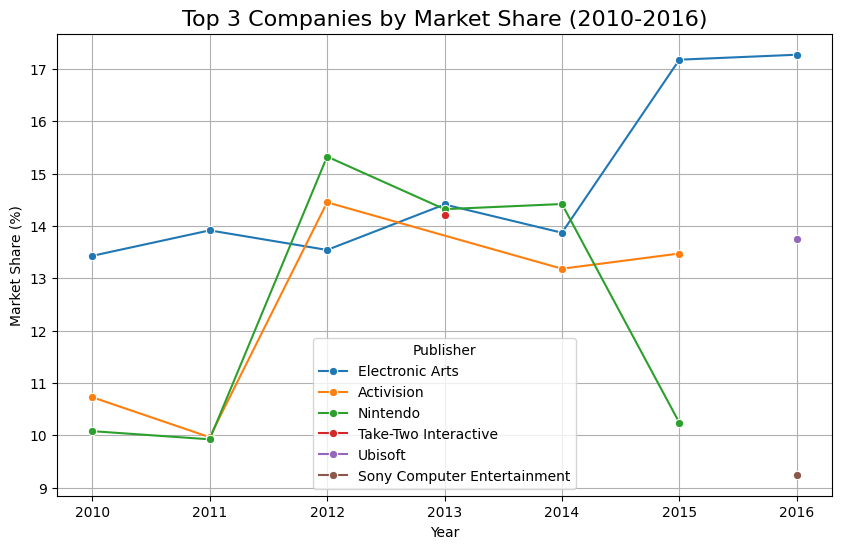

In [24]:
# Line plot to visualize the market share of the top 3 companies over time.
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='market_share', hue='publisher', data=top_3_companies, marker='o')
plt.title('Top 3 Companies by Market Share (2010-2016)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.xticks(top_3_companies['year'].unique())
plt.grid(True)
plt.legend(title='Publisher')
plt.show()

## Summary:

### Data Analysis Key Findings

Summary of the Data
The graph tracks the market share of several major video game publishers and platform holders from 2010 to 2016.

- 2010-2011: Nintendo's market share was relatively stable, hovering around 10%.

- 2012: Nintendo saw a significant and dramatic increase in market share, peaking at over 15%. This was a high point for the company in this period and put them at the top of the charted companies for that year. This spike is consistent with the launch of the Wii U console in late 2012, which initially generated high sales.

- 2013-2014: Nintendo's market share began to decline, dropping from its peak but still remaining competitive at around 14% in 2014.

- 2015-2016: This is the most critical period shown in the graph. Nintendo's market share plummeted, dropping to just over 10% in 2015 and then falling to its lowest point on the chart in 2016 at just over 9%. During this time, rivals like Electronic Arts and Activision saw their market share either increase or remain relatively stable. The chart shows Electronic Arts surpassing Nintendo in 2015 and continuing to grow its lead in 2016.

The overall trend for Nintendo from 2012 to 2016 is a sharp rise followed by a precipitous decline, which accurately reflects the commercial life cycle of the Wii U console.

### Insights and Recommendations

To increase its market share, Nintendo can leverage its strengths and learn from the successes of its competitors during this period.

1. Bolster Third-Party and Indie Developer Support

* The graph shows that competitors like Electronic Arts and Activision thrived during the period when Nintendo's market share was in decline. These companies have extensive third-party and multi-platform support.

* Analysis: To capture a larger slice of the market, Nintendo needs to continue to make its platform an attractive destination for third-party publishers and developers. By fostering strong relationships with developers of all sizes—from AAA to indie—Nintendo can ensure a steady stream of diverse content. This fills the gaps between its major first-party releases and provides a reason for a broader range of consumers to own a Nintendo console.

2. Lean into Unique and Underserved Markets

* The data suggests that Nintendo's market share plummeted when its strategy with the Wii U failed to capture the same casual audience as the Wii while also struggling to attract core gamers from its rivals.

* Analysis: Nintendo has always been successful by not directly competing with Sony and Microsoft on horsepower. To increase market share, Nintendo should continue to identify and dominate niches its competitors ignore. This includes leveraging its iconic family-friendly IPs and exploring innovative gameplay concepts that make their consoles a secondary purchase (or even a primary one) for consumers.

3. Strengthen Digital Sales and Services:

* The market landscape is shifting towards digital downloads and subscription services.

* Analysis: To compete with companies like Microsoft (Xbox Game Pass) and Sony (PlayStation Plus), Nintendo needs to continue to expand and improve its digital offerings. This includes its Nintendo Switch Online service, which provides access to a library of retro titles. Building a robust digital ecosystem can increase user engagement and provide a more consistent revenue stream, which in turn helps to grow market share.


# Japanese Market Share Analysis

Since Nintendo is a Japanese Publisher I would hypothesize that the company dominates the Japanese market and leads that market in terms of market share. Further analysis is needed to confirm this hypothesis

In [20]:
## Filter data for years 2010-2016
df_2010_2016 = df[(df['year'] >= 2010) & (df['year'] <= 2016)].copy()
print(f"Number of rows in df_2010_2016 after filtering: {df_2010_2016.shape[0]}")
publisher_jp_sales = df_2010_2016.groupby(['year', 'publisher'])['jp_sales'].sum().reset_index() #Calculate japanese sales for each publisher per year
industry_jp_sales = df_2010_2016.groupby('year')['jp_sales'].sum().reset_index() #Calculate total japanese sales per year

#Calculate market share in japan
market_share_jp_df = publisher_jp_sales.merge(
    industry_jp_sales, on='year', suffixes=('_publisher', '_industry')
)
market_share_jp_df['market_share'] = (market_share_jp_df['jp_sales_publisher'] / market_share_jp_df['jp_sales_industry']) * 100

# Rank publishers by market share in japan
market_share_jp_df['rank'] = market_share_jp_df.groupby('year')['market_share'].rank(method='first', ascending=False)

# Filter for top 5 publishers in japan
top_5_jp_publishers = market_share_jp_df[market_share_jp_df['rank'] <= 5].sort_values(by=['year', 'rank'])
display(top_5_jp_publishers)



Number of rows in df_2010_2016 after filtering: 5188


,year,publisher,jp_sales_publisher,jp_sales_industry,market_share,rank
92,2010,Nintendo,16.32,59.60,27.382550,1.0
24,2010,Capcom,7.33,59.60,12.298658,2.0
87,2010,Namco Bandai Games,6.71,59.60,11.258389,3.0
73,2010,Konami Digital Entertainment,5.92,59.60,9.932886,4.0
118,2010,Square Enix,4.08,59.60,6.845638,5.0
214,2011,Nintendo,13.43,53.06,25.310969,1.0
213,2011,Namco Bandai Games,9.71,53.06,18.300038,2.0
202,2011,Konami Digital Entertainment,3.64,53.06,6.860158,3.0
234,2011,Square Enix,3.49,53.06,6.577459,4.0
164,2011,Capcom,2.52,53.06,4.749340,5.0


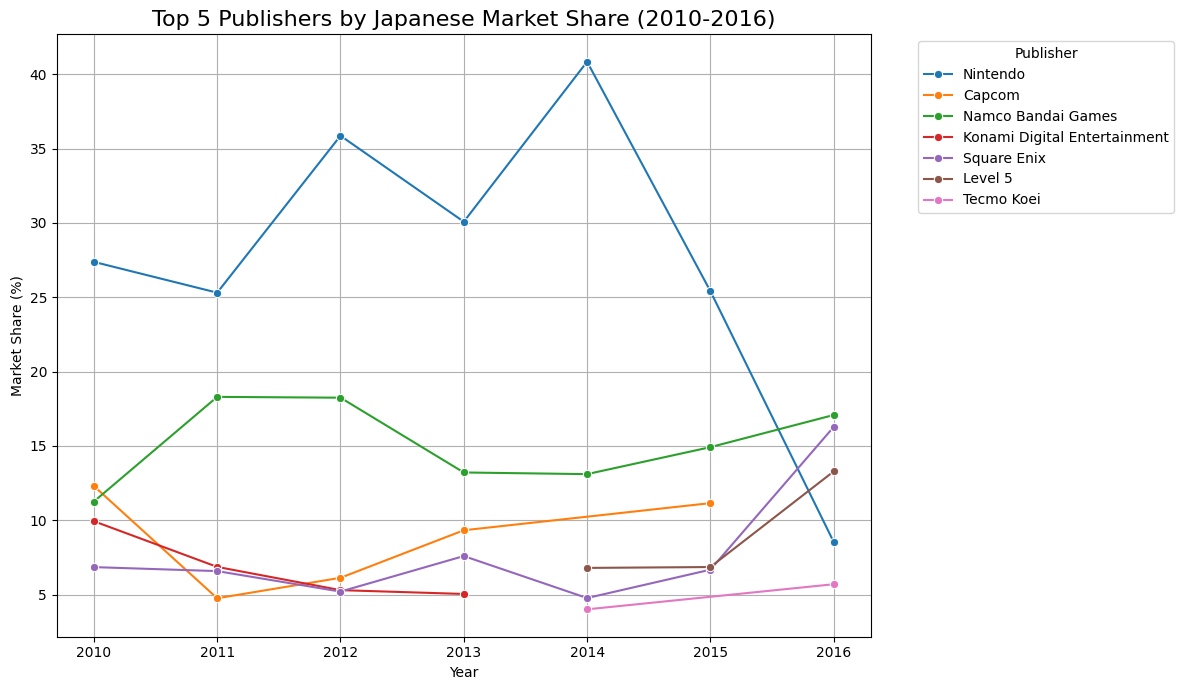

In [22]:
# Visualize the top 5 publishers' Japanese market share over time.
plt.figure(figsize=(12, 7))
sns.lineplot(x='year', y='market_share', hue='publisher', data=top_5_jp_publishers, marker='o')
plt.title('Top 5 Publishers by Japanese Market Share (2010-2016)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.xticks(top_5_jp_publishers['year'].unique())
plt.grid(True)
plt.legend(title='Publisher', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Summary:

### Data Analysis Key Findings

*   The top 5 publishers by Japanese market share between 2010 and 2016 included Nintendo, Namco Bandai Games, Capcom, Konami Digital Entertainment, Square Enix, Level 5, and Tecmo Koei.
*   Nintendo consistently ranked among the top publishers during the period.
*   The specific publishers within the top 5 and their rankings varied from year to year.

### Insights or Next Steps
* Nintendo's steep decline could coincide with the end of the Wii lifecycle and the company preparing to drop the Nintendo Switch console, Market Share can be expected to rebound after 2016

In [23]:
## Filter data for years 2010-2016
df_2010_2016 = df[(df['year'] >= 2010) & (df['year'] <= 2016)].copy()
print(f"Number of rows in df_2010_2016 after filtering: {df_2010_2016.shape[0]}")
publisher_eu_sales = df_2010_2016.groupby(['year', 'publisher'])['eu_sales'].sum().reset_index() #Calculate japanese sales for each publisher per year
industry_eu_sales = df_2010_2016.groupby('year')['eu_sales'].sum().reset_index() #Calculate total japanese sales per year

#Calculate market share in europe
market_share_eu_df = publisher_eu_sales.merge(
    industry_eu_sales, on='year', suffixes=('_publisher', '_industry')
)
market_share_eu_df['market_share'] = (market_share_eu_df['eu_sales_publisher'] / market_share_eu_df['eu_sales_industry']) * 100

# Rank publishers by market share in europe
market_share_eu_df['rank'] = market_share_eu_df.groupby('year')['market_share'].rank(method='first', ascending=False)

# Filter for top 5 publishers in europe
top_5_eu_publishers = market_share_eu_df[market_share_eu_df['rank'] <= 5].sort_values(by=['year', 'rank'])
display(top_5_eu_publishers)

Number of rows in df_2010_2016 after filtering: 5188


,year,publisher,eu_sales_publisher,eu_sales_industry,market_share,rank
44,2010,Electronic Arts,31.18,178.33,17.484439,1.0
7,2010,Activision,17.69,178.33,9.919812,2.0
92,2010,Nintendo,16.52,178.33,9.263725,3.0
133,2010,Ubisoft,13.98,178.33,7.839399,4.0
115,2010,Sony Computer Entertainment,12.75,178.33,7.149666,5.0
179,2011,Electronic Arts,28.47,168.68,16.878112,1.0
250,2011,Ubisoft,17.85,168.68,10.582167,2.0
149,2011,Activision,16.78,168.68,9.947830,3.0
214,2011,Nintendo,14.38,168.68,8.525018,4.0
159,2011,Bethesda Softworks,9.96,168.68,5.904672,5.0


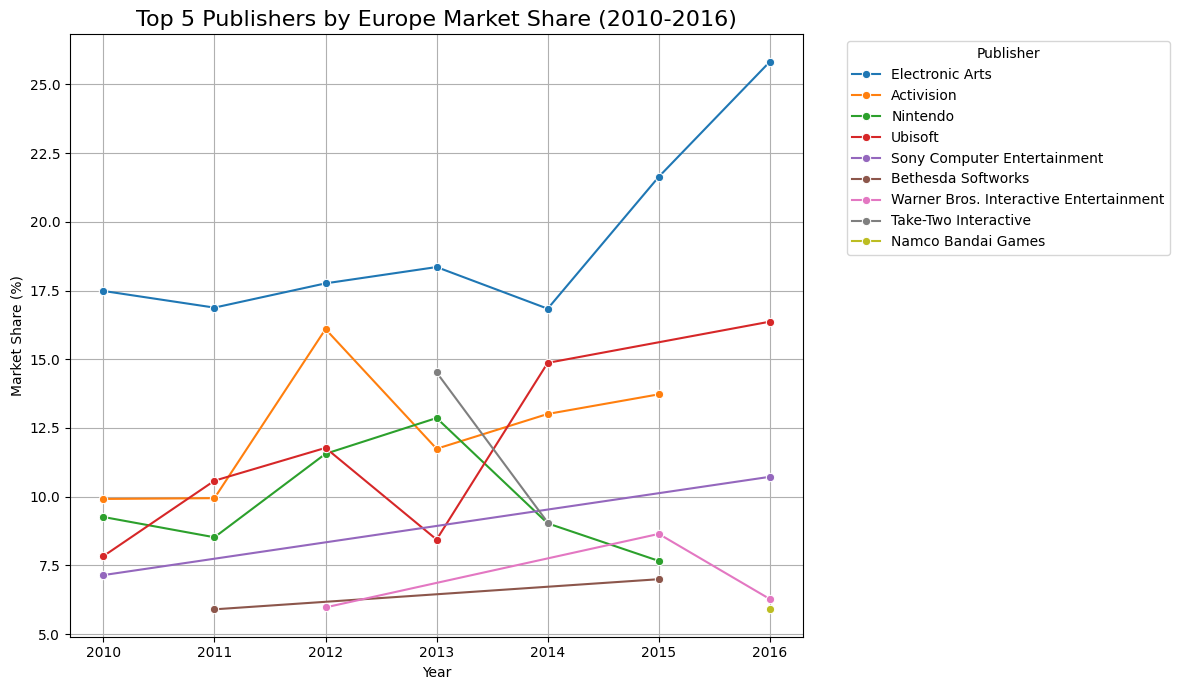

In [24]:

# Visualize the top 5 publishers' Europe market share over time.
plt.figure(figsize=(12, 7))
sns.lineplot(x='year', y='market_share', hue='publisher', data=top_5_eu_publishers, marker='o')
plt.title('Top 5 Publishers by Europe Market Share (2010-2016)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.xticks(top_5_eu_publishers['year'].unique())
plt.grid(True)
plt.legend(title='Publisher', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Summary:

### Data Analysis Key Findings

The European market was particularly tough for Nintendo. While they had a brief peak, they were consistently outperformed by EA and Ubisoft. The graph shows EA's market share soaring in Europe from 2014-2016, reaching over 25% while Nintendo's dropped to single digits.

### Recommendations
1. Strengthen Third-Party and Indie Developer Relationships: The data shows that companies like EA and Activision maintained or increased their market share while Nintendo struggled. These companies' multi-platform blockbusters drove sales on competing consoles.

* Streamline development: Make it easier for third-party studios to port their games to Nintendo's hardware.

* Attract key franchises: Work with publishers to bring major AAA multi-platform titles to Nintendo's console, which helps to attract a different demographic of gamer.

* Court indie developers: The Switch has been a haven for indie games. By continuing to support and promote smaller studios, Nintendo can create a diverse library of content that appeals to a wide audience.

2. Optimize Regional Strategy, Especially in Europe: The graphs show that Europe was a particularly weak market for Nintendo during this period, with competitors like EA and Ubisoft dominating.

* Tailored marketing: Develop more targeted marketing campaigns that resonate with European gamers' preferences.

* Localization: Ensure that games are properly localized for different European languages and cultures to expand their appeal.

* Partnerships: Form strategic partnerships with European retailers and distributors to improve visibility and access to their products.